# 1.5.1 - Beginner - Introduction to Data Visualization I

COMET Team <br> *Anneke Dresselhuis, Jonathan Graves*  
2023-01-12

## Outline

### Prerequisites

-   Introduction to Jupyter
-   Introduction to R
    -   Be able to load data and packages in R
    -   Be able to create variables and objects in R
    -   Be familiar with the general syntax of R commands

### Learning Outcomes

-   Identify best practices for data visualization design
-   Describe when to use the following kinds of visualizations to answer
    specific questions using a data set:
    -   scatterplots
    -   line plots
    -   bar plots
    -   histograms
-   Use the `ggplot2` package in R to create and refine the above
    visualizations using
    -   geometric objects
    -   aesthetic mappings: `x`, `y`, `fill`, `color`
    -   labeling: `xlab`, `ylab`, `labs`
    -   font control and legend positioning: theme
-   Describe the difference between vector and raster file outputs
-   Use `ggsave` to save visualizations in `.png` and `.svg` format

### References

-   Timbers, T., Campbell, T., Lee, M. (2022). [*Data Science: A First
    Introduction*.](https://datasciencebook.ca/viz.html)
-   Metwalli, S. A. (2021, July 15). Data Visualization 101: How to
    choose a chart type. Medium. Retrieved June 10, 2022, from
    https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6

## Part 1: Understanding Visualization

### Introduction

> **“The purpose of a visualization is to answer a question about a data
> set of interest.”**  
> Timbers, T., Campbell, T., Lee, M. (2022). [*Data Science: A First
> Introduction*.](https://datasciencebook.ca/viz.html)

In econometrics, good data visualizations should always…

1.  Answer a well-thought-out and relevant economic research question.
2.  Provide readers with a clear understanding of the research question
    and answer

Questions to keep in mind:

-   *Who is our audience?*
-   *What do they know?*
-   *What is the question we’re trying to answer?*

Not only are data visualizations incredibly important as narrative
outputs from data analysis, they can also help us identify patterns or
anomalies as we process our data.

### Principles of Design: Data Visualization *DOs* and *DONT’s*

> **DO** use data visualization to tell the story of the data
> *truthfully*  
> **DO** remember that a visualization’s accuracy is only as good as the
> data is  
> **DO** label your axes in font sizes that are readable and use
> descriptive titles

> **DON’T** choose colours that are very similar to each other when
> trying to distinguish 2 variables (red & blue \> red & orange)  
> **DON’T** use design features (eg, exaggerated scaling) to manipulate
> readers into believing a particular narrative of the data

### Types of Visualizations:

The four following plot types we will be working with can all be found
in the `ggplot2` package:

<sub>Note: There are other plots that can be generated using this package which we’ll explore in *Introduction to Data Visualization II* or check out [R studio’s ggplot2 Cheat Sheet](https://www.rstudio.com/resources/cheatsheets/)</sub>

-   **Scatter plot**
    -   Visualizes the relationship between two quantitative variables
    -   Good for showing relationships and groupings among variables
        from relatively large datasets
-   **Line plot**
    -   Visualizes trends with respect to an independent, ordered
        quantity (e.g time)
    -   Good for when one of our variables is ordinal (time-like) or to
        display multiple series on a common timeline
-   **Bar plot**
    -   Visualizes comparisons of amounts
    -   Good for comparing a few categories as parts of a whole or
        across time
-   **Histogram**
    -   Visualizes the distribution of one quantitative variable
    -   Good for working with a discrete variable and visualizing all
        its possible values and how often they occur

*Definitions adapted from: [Data Science: A First
Introduction](https://datasciencebook.ca/viz.html)*[.](https://datasciencebook.ca/viz.html)

![Examples of Four Plot
Types](attachment:media/plot_type_examples.png "Figure 4.1: Examples of scatter, line and bar plots, as well as histograms.")

*Figure 1. Examples of scatter, line and bar plots, as well as
histograms. (from [Data Science: A First
Introduction](https://datasciencebook.ca/viz.html))*

### Loading data

In this tutorial, we will be working with the Penn World Table 10.0.
This data is via:

-   Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015),
    “The Next Generation of the Penn World Table” American Economic
    Review, 105(10), 3150-3182, available for download at
    https://www.rug.nl/ggdc/productivity/pwt/

To download the dataset we will be using for this notebook:

1.  Click the link provided above. The PWT page should appear
2.  Scroll down until three access options appear
3.  Click Stata and a Stata file (`.dta`) should immediately download.
    Now move that file to your media directory and we can start the
    analysis!

Let’s start by importing the packages and data into our notebook. if
you’re not sure what a variable represents, check out the documentation
on the link above.
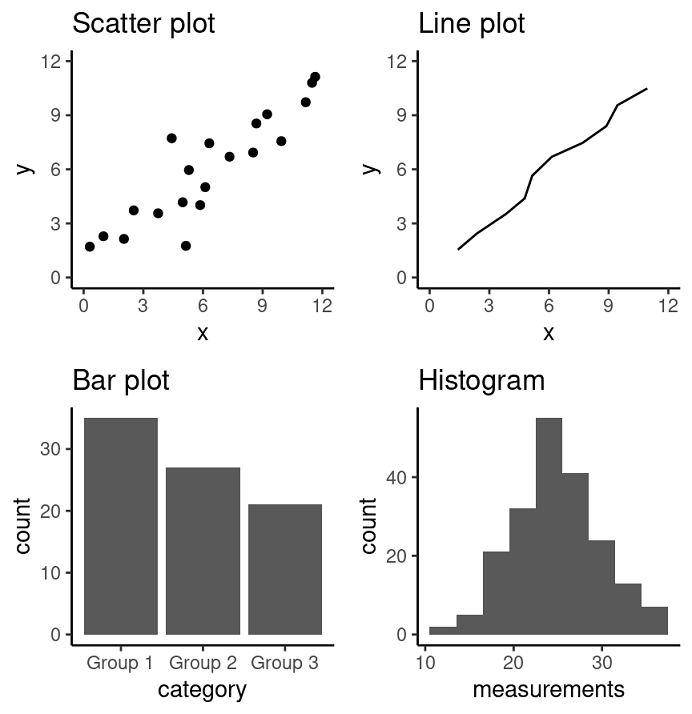

In [ ]:
source("beginner_intro_to_data_visualization1_tests.r")

In [ ]:
# import packages
library(tidyverse) # contains ggplot2, which is what we'll be using!
library(haven)

# load the data
pwt_data <- read_dta("../datasets_beginner/pwt100.dta") # make sure that the .dta file has this exact name

# declare factors
pwt_data <- as_factor(pwt_data)

pwt_data <- pwt_data %>%
    mutate(countrycode = as.factor(countrycode)) %>%
    mutate(country = as.factor(country)) %>%
    mutate(currency_unit = as.factor(currency_unit))

# check that it looks OK
# there will be a lot of missing data
glimpse(pwt_data)

As you can see, this data set includes 12,810 observations and many
different variables.

Question time: **How many variables are included in this data set?**  
*Hint: variables are stored in columns*

In [ ]:
#Fill in the ... below with your answer to the above question

answer_1 <- ...

test_1()

#### Understanding `ggplot2`

R uses a “language” for how graphics are created called the **grammar of
graphics**, which is a system of best practices from statistical
visualization theory that centres data in the process.

> **Note**: the `ggplot2` cheatsheet is an important companion to this
> Notebook. This is a CC-by-SA Material from RStudio’s
> [website](https://www.rstudio.com/resources/cheatsheets/)

#### Layers with `ggplot`

In this “grammar” of graphics, we create a series of “layers” which
implement a specific visual output:

1.  Identify a dataset from which we want to create our graph (`data=`)
2.  Associate variables in that dataset to **aesthetics** (`aes=`)
    -   **Aesthetics** represent different properties of a graph (e.g:
        “what goes on the $x$-axis”, or “what does the color of the line
        represent”). Each type of visualization is associated with a
        collection of necessary and optional aesthetic features.
3.  Attach a coordinate system and a plot type to the graph using
    `geom`, which takes the aesthetics and describes them
    -   This includes options like `position` which indicates how to
        combine elements (e.g. stack the bars in a barchart, or place
        them side-by-side)
4.  Finally, tweak the visualization by adding labels or changing the
    colour scheme

Let’s see what this looks like in practice.

#### Interpreting the Data

A few of the key variables represent the following:

`rgdpe` = expenditure-side real GDP (millions of USD)  
`pop` = population of a given country (millions of people)  
`year` = year of data recording (1950-2019)  
`country` = country being studied (183 countries are captured in this
data set)  
`hc` = an index of human capital per person, which is based on average
years of schooling and the return to education  
`emp` = number of persons engaged in employment (millions)

#### Beginning our Analysis

Let’s say we are interested in creating a visualization that answers the
following question:  
**How has real GDP per Capita changed over time in North American
countries?**

In [ ]:
# First, filter the dataset to only include data on North American countries
NA_data <- filter(pwt_data, (countrycode == "CAN")|(countrycode == "USA")|(countrycode == "MEX"))

# We can take a look at our the rgdpe/pop variable by making a quick histogram here
histogram <- ggplot(data = NA_data, aes(x = rgdpe/pop)) + 
             geom_histogram(colour = "black", bins = 20)
histogram

It looks like a solid number of GDP per capita measurements are under
20,000. Let’s get back to our main chart to find out what might be
driving this!

In [ ]:
# Use the ggplot command and specify the data frame that is to be used (NA_data in this case) and the set of plot aesthetics (which variables will be included) 
plot <- ggplot(data = NA_data,  # this declares the data for the chart; all variable names are in this data
                aes(# this is a list of the aesthetic features of the chart
                    x = year,   # for example, the x-axis will be "year" (a continuous variable)
                    y = rgdpe/pop, # the y-axis will be expenditure-based real GDP per capita
                    fill = country, # this means that the country variable in our dataset will determine the colour of the bars
                    color = country # country variable will also determine the color of the borders or outline
                ),
                )

# Now, input the labels to the aesthetic features added above
plot <- plot + labs( # add human-readable, aesthetic labels
                    x = "Year",  # label for the x aesthetic (x-axis title)
                    y = "Real GDP per capita (expenditure-based)", #y-axis title
                    color = "Country", # adds the label "Country" to the legend and tells us which colour is used to represent which country
                    fill = "Country", # similarly, tells us about the colours used to fill
                    title = "North American Real GDP per Capita over Time") # and title of plot

# Because the variable "country" is expressed by colours, we are able to change the colours used in the chart using the commands below. Try playing with different palettes. To display other palettes use the command display.brewer.all()
plot <- plot + scale_fill_brewer(palette="Accent") #set the colour palette for fills
plot <- plot + scale_color_brewer(palette="Accent") #set the colour palette for outlines
options(repr.plot.width = 15, repr.plot.height = 9) #adjusts plot size: try playing around with the dimensions, and then return the values to width = 15 and height = 9

# Finally, input the type of vizualisation of the chart
plot1 <- plot + geom_col( # now we add the visualization geom_col() produces a bar graph)
                    position = "dodge") # this places the visualizations side-by-side
                                        # if you change position to "stack" it will be a stacked graph!
plot1

If we wanted to change the visualization and make this a line graph
instead of a bar chart, we could do the following:

In [ ]:
# fig.width = 40
plot2 <- plot + geom_line()

plot2 # show the plot

Let’s work through a few more examples together. We’ll also learn how to
adjust text size in the next section as well!

## Part 2: Building a Visualization

It’s important to note that we should build a visualization
piece-by-piece and making adjustments along the way. Don’t worry about
getting it completely right on the first try!

Let’s say we are interested in creating a visualization that answers the
following question:  
**What is the relationship between GDP per capita and human capital in
the world today?**

The first thing we want to do is identify what data we need:

-   GDP: `rdgpe` or `rdgpo` (Quiz: what’s the difference?)
-   Population: `pop`
-   Human capital: variable `hc`
-   Data from “today”: `year == 2019`, the most recent data in our
    sample

Let’s start out by `filter`-ing the data to just get 2019 data.

In [ ]:
figure_data <- filter(pwt_data, year == 2019)

head(figure_data$year)

Nice, it looks like we’ve got all the 2019 data! Let’s first consider
what kind of visualization we want.

We are interested in the **relationship between two quantitative
variables** understanding **how they move together**

While there are a couple of options, we’ll start with a **scatterplot**.
If we consult our
[cheat-sheet](https://www.rstudio.com/resources/cheatsheets/), we can
see that scatterplots are the `geom_point()` command. This *requires*
the aesthetic properties:

-   `x`, the $x$-axis
-   `y`, the $y$-axis

We then have other optional ones, like
`alpha, color, fill, shape, size, stroke` see [R studio’s ggplot2 Cheat
Sheet](https://www.rstudio.com/resources/cheatsheets/).

> Note:
>
> 1.  You can assign aesthetics on *either* the `ggplot` layer *or* on a
>     `geom`. The only difference is that the `ggplot` aesthetics are
>     automatically inherited by all other layers.
> 2.  Generally, any aesthetic property which can be assigned in `aes()`
>     can also be assigned to the `geom` directly; ie: if you wanted to
>     make a line dashed or a point red, you could do this by setting
>     `geom_point(color = "red")`. However, this will apply to all parts
>     of the `geom` so use it wisely!

Let’s start simple, and make `x` represent human capital, and `y`
represent real GDP per capita. We can start our visualization by
creating our `ggplot` object and assigning all these properties:

In [ ]:
figure <- ggplot(data = figure_data, # associate the data we chose
                 aes(
                     x = hc,  # x is human capital
                     y = rgdpe/pop # we divide rgdpe by pop to get gdp per capita
                 ))

figure <- figure + labs(x = "Human Capital",
                        y = "Real GDP per capita (expenditure-based)",
                        title = "Global GDP per Capita and Human Capital in 2019") +
                        theme(
                            text = element_text(
                                size = 15)) #increases text size: try playing around with this number!

# note: you can set aethestics to be simple functions of variables!

After running the previous cell, nothing was printed in our notebook;
this is because we need to assign our visualization! Right now, it’s
just data and properties. Let’s test it our by adding our `geom_point()`
layer:

In [ ]:
figure + geom_point()

Nice! Now let’s make the size of each point relative to the population
so bigger countries would be more prominent on the graph. We can do this
by assigning the aesthetic again:

In [ ]:
figure + geom_point(aes(
                    size = pop,)) # assigns the size of the point to be relative to the population values

Now let’s make colour of each point change as the employment (`emp`)
rate changes so that darker colors would represent higher labour force
utilization. Again, we can do this by assigning the aesthetic:

In [ ]:
figure <- figure + geom_point(aes(
                    size = pop,
                    colour = 100*emp/pop))

figure

Great work! If we wanted to change the colours, we can set colours in R
is using palettes. The list of all the palette options are:

In [ ]:
RColorBrewer::display.brewer.all() 

Let’s choose `YlOrRed`. We can apply this using the following (somewhat
cryptic) command:

In [ ]:
figure <- figure + scale_color_distiller(palette="YlOrRd")

figure

options(repr.plot.width = 15, repr.plot.height = 9)

Notice that we used `color_brewer` earlier and `color_distiller` here.

-   `color_brewer` is for visualizations with discrete variables

-   `color_distiller` is for continuous.

As you see, building visualization requires lots of trial and error!
Always ask yourself: “Is this effective? Is this what I want it to do?”

### Exporting Visualizations

Once we’ve decided that our graph can successfully answer our economic
question, we can export it from Jupyter using the `ggplot` package with
the following command:

-   `ggsave`: save a visualization using the following key arguments
    -   `("file_name.file_format", my_plot, width = #, height = #)`

> You can check out an expanded list of possible arguments at the [R
> documentation page for
> `ggsave`](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.0/topics/ggsave)

1.  The first part of the argument `"file_name.file_format"` is where we
    decide on the name and file format to be saved in the Jupyter
    workspace.
    -   You can add `"folder/file_name.file_format"`) to save to a
        specific folder, (The format depends on the context you plan to
        use the visualization in. Images are typically stored in either
        **raster** or **vector** formats. See [*Data Science: A First
        Introduction*.](https://datasciencebook.ca/viz.html#saving-the-visualization)

**Raster images** are represented as a 2-D grid of square pixels, each
with its own color. Compressed rastor images are “lossy” if the image
cannot be perfectly re-created but differences are minimal. “Lossless”
formats, on the other hand, allow a perfect display of the original
image.

Common raster file types:

-   JPEG (.jpg, .jpeg): lossy, usually used for photographs
-   PNG (.png): lossless, usually used for plots / line drawings
-   BMP (.bmp): lossless, raw image data, no compression (rarely used)
-   TIFF (.tif, .tiff): typically lossless, no compression, used mostly
    in graphic arts, publishing
-   Open-source software: GIMP

**Vector images** are represented as a collection of mathematical
objects (lines, surfaces, shapes, curves). When the computer displays
the image, it redraws all of the elements using their mathematical
formulas.

Common vector file types:

-   SVG (.svg): general-purpose use
-   EPS (.eps): general-purpose use (rarely used)
-   Open-source software: Inkscape

|      | Raster Image                                                                       | Vector Image                                                               |
|------------|------------------------------|------------------------------|
| Pros | Takes the same amount of space and time to load regardless of the image’s content. | High quality image: you can zoom in/scale up without compromising quality. |
| Cons | May look “pixelated” when zoomed in.                                               | May take longer to load depending on complexity of the image is.           |

1.  The second part of the argument, `my_plot` specifies which plot in
    our analysis we’d like to export

2.  The last key part of the argument `width =` and `height =` specifies
    the dimensions of our image. If we haven’t made modifications to the
    size, these commands can be left out. Since we adjusted the graph
    output size using
    `options(repr.plot.width = 15, repr.plot.height = 9)`we will specify
    these dimensions as we export.

Try uncommenting the code section below and saving our “Global GDP per
capita and Human Capital in 2019” graph in the Jupyter directory that
this notebook is stored in.

In [ ]:
# ggsave("gdp_hc_plot.png", figure, width = 15, height = 9)

Did you see file appear in the directory? Now try saving the same graph
as an `.svg` in the code cell below.

In [ ]:
# ggsave("gdp_hc_plot. ...", figure, width = ..., height = ...)

As we have seen, R makes it easy to create high-quality, impactful
graphics. We’ll let you try it on your own now!

## Part 3: Making Your Own Chart

For the final section of this notebook, you’ll make your own
visualization using the Penn Data again. Let’s say you want to build a
visualization on **the relationship between the economic development of
China and United States over time.**

Some variables you might want to consider are:

-   `year`: the year of observation
-   `rtfpna`: total factor productivity [(here’s a link, if you’re ECON
    102 is
    rusty)](https://en.wikipedia.org/wiki/Total_factor_productivity)
-   `rgdpe`: real GDP (expenditure-based)
-   `pop`: population
-   `ccon`: real consumption of households
-   `avh`: average hours worked

To be clear: you don’t need to use *all* of these variables in your
visualization.

1.  Start by deciding what variables are *essential* and which ones are
    *optional*. Choose at least two to include in your visualization.
2.  Decide what kind of visualization you want to make. Relate your
    choices to the best practices for types of visualizations. See
    [cheat-sheet](media/data-visualization.pdf) for more.
3.  Finally, decide how you want to present it; what should the final
    product look like?

A good idea is to create it in layers, like we did before - updating as
you go. We’ll start you off with some of the data and code scaffolding:

In [ ]:
# my_data <- filter(pwt_data, (countrycode == "USA")|(countrycode == "CHN"))

# my_figure # give your plot a descriptive title
# <- ggplot(data = my_data, aes( #add your aesthetics below
#                 x = ..., 
#                 y = ...,
#                 color = ...)) + # remember this is optional
#                 labs(x = "...", # what labels do you want to add?
#                     y = "...",
#                     title = "...") +
#                     theme(text = element_text(size = ...))+
#                 geom_...() # what geom will you use?  Does it need options?

#my_figure 

# uncomment (delete the leading "#" symbol) to use these lines. 
# Pro tip, you can uncomment an entire section by highlighting it and selecting "command + /"

See if you can piece together a decent graph from what you’ve learned so
far. Depending on the direction you choose, your plot might look
something like this one below. If you’re stuck, try to re-create this
one, before starting on your own.

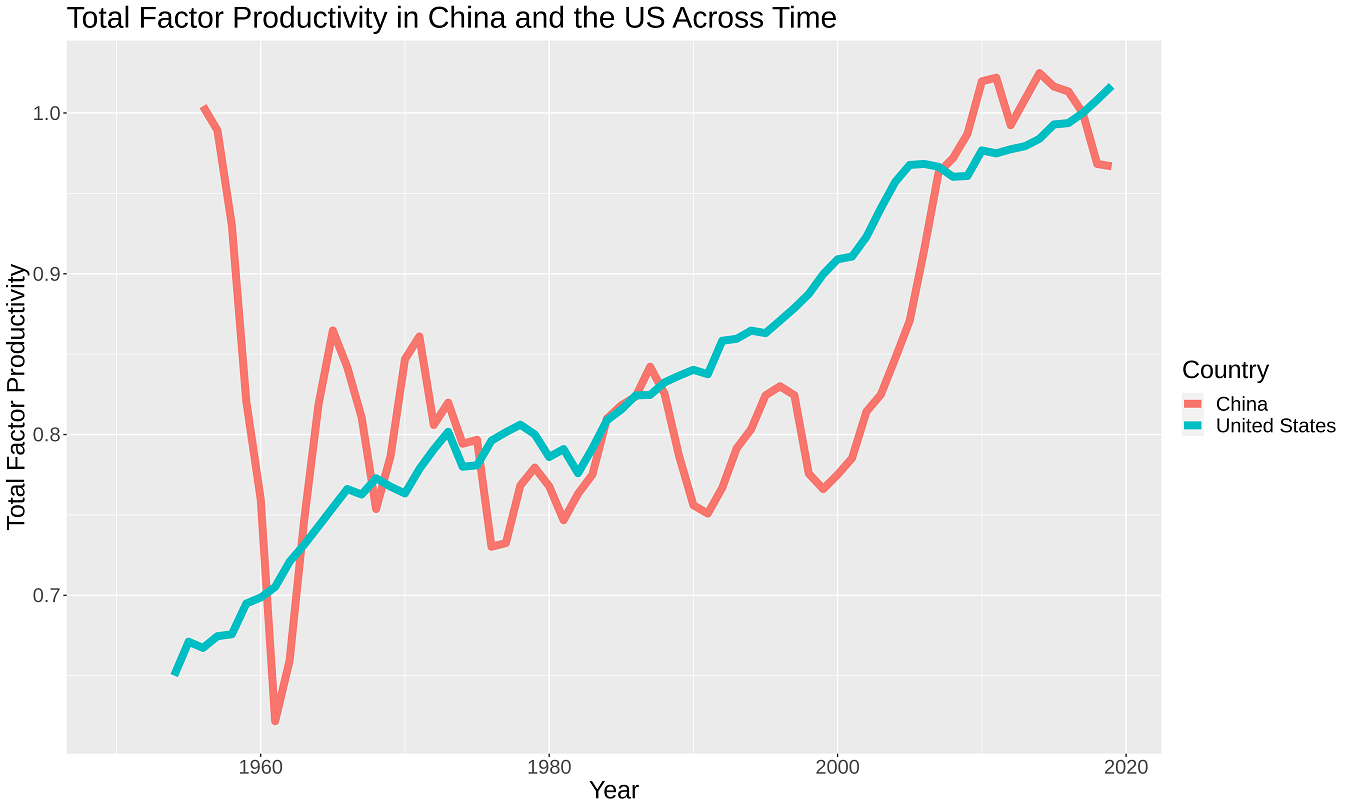

This visualization was made using the following features:

-   `y = year`, `x = rtfpna`
-   `geom_line()` function with argument: `size = 3` in between the
    parentheses to make the lines a bit more visible
-   `color = country` to create two unique lines on the graph for China
    and the US
-   `labs(color = "Country")` to give nice, human readable title to our
    color legend